In [ ]:
import numpy as np
import sklearn
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/Crime_Data_2010_2017.csv")

In [ ]:
df['Crime_Code']=df['Crime Code']


In [ ]:
df.drop(df['Crime Code'],axis=0)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Crime_Code
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",626
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",510
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",510
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",510
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584311,172116482,09/07/2017,09/07/2017,1005,21,Topanga,2141,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,IC,Invest Cont,440.0,NaN,NaN,NaN,23800 CALVERT ST,NaN,"(34.1883, -118.6536)",440
1584312,172116489,09/07/2017,09/07/2017,1200,21,Topanga,2156,330,BURGLARY FROM VEHICLE,0344 1605,...,IC,Invest Cont,330.0,NaN,NaN,NaN,6600 TOPANGA CANYON BL,NaN,"(34.1905, -118.6059)",330
1584313,172116491,08/30/2017,07/15/2017,1,21,Topanga,2147,649,DOCUMENT FORGERY / STOLEN FELONY,0930 1822,...,IC,Invest Cont,649.0,NaN,NaN,NaN,20900 SHERMAN WY,NaN,"(34.201, -118.5885)",649
1584314,172116498,09/08/2017,09/08/2017,1845,21,Topanga,2136,946,OTHER MISCELLANEOUS CRIME,1402,...,IC,Invest Cont,946.0,998.0,NaN,NaN,REMMET,WYANDOTTE,"(34.2029, -118.6003)",946


In [ ]:
df.isnull().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        412
MO Codes                   171759
Victim Age                 128659
Victim Sex                 145199
Victim Descent             145232
Premise Code                   76
Premise Description          2751
Weapon Used Code          1059559
Weapon Description        1059560
Status Code                     2
Status Description              0
Crime Code 1                    7
Crime Code 2              1484319
Crime Code 3              1582133
Crime Code 4              1584247
Address                         0
Cross Street              1321583
Location                        9
Crime_Code                      0
dtype: int64

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df["Location "].head(10)

In [ ]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [ ]:
len(df. axes[1])

In [ ]:
df.info()

In [ ]:
crime_codes=dict(zip(df["Crime Code"],df["Crime Code Description"]))
area=dict(zip(df["Area ID"],df["Area Name"]))
premise=dict(zip(df["Premise Code"],df["Premise Description"]))
#zip returns mapping work of crime code to Crime Code Discription
#therefore whole process return mapping of each crime with their code 

In [ ]:
crime_codes

In [ ]:
area

In [ ]:
df2=df[["Time Occurred","Area ID", "Reporting District", "Crime Code", "Victim Age", "Victim Sex", \
      "Victim Descent", "Premise Code", "Location "]]
df2["location_x"]=pd.Series(index=df.index)#df["Location "]
df2["location_y"]=pd.Series(index=df.index)#df["Location "]

<ipython-input-5-68cf180161b1>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2["location_x"]=pd.Series(index=df.index)#df["Location "]
<ipython-input-5-68cf180161b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["location_x"]=pd.Series(index=df.index)#df["Location "]
<ipython-input-5-68cf180161b1>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2["location_y"]=pd.Series(index=df.index)#df["Location "]
<ipython-input-5-68cf180161b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a 

In [ ]:
df2=df[["Time Occurred","Area ID", "Reporting District", "Crime_Code", "Victim Age", "Victim Sex","Victim Descent", "Premise Code" ]]

In [ ]:
df2

,Time Occurred,Area ID,Reporting District,Crime_Code,Victim Age,Victim Sex,Victim Descent,Premise Code
0,1800,12,1241,626,30.0,F,W,502.0
1,2300,20,2071,510,NaN,NaN,NaN,101.0
2,2030,18,1823,510,12.0,NaN,NaN,101.0
3,1800,18,1803,510,NaN,NaN,NaN,101.0
4,2300,21,2133,745,84.0,M,W,501.0
...,...,...,...,...,...,...,...,...
1584311,1005,21,2141,440,51.0,F,W,501.0
1584312,1200,21,2156,330,40.0,M,W,108.0
1584313,1,21,2147,649,52.0,M,W,203.0
1584314,1845,21,2136,946,47.0,M,H,101.0


In [ ]:
#filling the missing value,converting Location () into x and y 
def func_x(val):
    if val == "":
        return 0.0
    return val.strip("() ").split()[0].strip(" ,")

def func_y(val):
    if val == "":
        return 0.0
    return val.strip("() ").split()[1].strip(" ,")

df2["Location "].fillna("(0.0, 0.0)")
df2["Location "]=df2["Location "].replace(np.nan,"(0.0, 0.0)")
ser=df2["Location "].apply(func_x)
df2["location_x"]=ser
ser=df2["Location "].apply(func_y)
df2["location_y"]=ser

df2["location_x"]=pd.to_numeric(df2["location_x"])
df2["location_y"]=pd.to_numeric(df2["location_y"])

In [ ]:
df2=df2.drop("Location ",axis=1)

KeyError: ignored

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Time Occurred       1584316 non-null  int64  
 1   Area ID             1584316 non-null  int64  
 2   Reporting District  1584316 non-null  int64  
 3   Crime Code          1584316 non-null  int64  
 4   Victim Age          1455657 non-null  float64
 5   Victim Sex          1439117 non-null  object 
 6   Victim Descent      1439084 non-null  object 
 7   Premise Code        1584240 non-null  float64
 8   location_x          1584316 non-null  float64
 9   location_y          1584316 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 120.9+ MB


In [ ]:
pd.set_option("display.max_rows", None)
df["Cross Street"].value_counts(sort=True, ascending=False)
#add this to EDA

In [ ]:
df2["Premise Code"]=df2["Premise Code"].replace(np.nan,0.0)
df2["Premise Code"]=df2["Premise Code"].fillna(method ='ffill',limit=1)
df2["Premise Code"]=df2["Premise Code"].fillna(method ='ffill',limit=1)
df2["Victim Sex"]=df2["Victim Sex"].fillna(method ='ffill',limit=1)
df2["Victim Age"]=df2["Victim Age"].fillna(method ='ffill',limit=1)
df2["Victim Descent"]=df2["Victim Descent"].fillna(method ='ffill',limit=1)



<ipython-input-7-aead075009bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Premise Code"]=df2["Premise Code"].replace(np.nan,0.0)
<ipython-input-7-aead075009bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Premise Code"]=df2["Premise Code"].fillna(method ='ffill',limit=1)
<ipython-input-7-aead075009bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
df['Location '].isnull().sum()

9

In [ ]:
df['Cross Street'].isnull().sum()

1321583

In [ ]:
df2.isnull().sum()

Time Occurred             0
Area ID                   0
Reporting District        0
Crime_Code                0
Victim Age            23940
Victim Sex            29661
Victim Descent        29672
Premise Code              0
dtype: int64

In [ ]:
df2["Premise Code"]=df2["Premise Code"].replace(np.nan,0.0)
df2["Premise Code"]=df2["Premise Code"].fillna(df2['Premise Code'].value_counts().index[0])
df2["Victim Sex"]=df2["Victim Sex"].fillna(df2['Victim Sex'].value_counts().index[0])
df2["Victim Age"]=df2["Victim Age"].fillna(df2['Victim Age'].value_counts().index[0])
df2["Victim Descent"]=df2["Victim Descent"].fillna(df2['Victim Descent'].value_counts().index[0])

<ipython-input-9-3c256fe26787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Premise Code"]=df2["Premise Code"].replace(np.nan,0.0)
<ipython-input-9-3c256fe26787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Premise Code"]=df2["Premise Code"].fillna(df2['Premise Code'].value_counts().index[0])
<ipython-input-9-3c256fe26787>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
df2.isnull().sum()

Time Occurred         0
Area ID               0
Reporting District    0
Crime_Code            0
Victim Age            0
Victim Sex            0
Victim Descent        0
Premise Code          0
dtype: int64

In [ ]:
# columns to be used - Time Occurred(int), Area ID(categorical), 
# crime code (138 categorical), Victim Age(int), Victim Sex(categorical), Victim Descent(categorical),
# Location (tuple of floating point numbers)

In [ ]:
df2["Area ID"]=df2["Area ID"].astype(int)
df2["Reporting District"]=df2["Reporting District"].astype(str)
df2["Crime Code"]=df2["Crime Code"].astype(int)
df2["Premise Code"]=df2["Premise Code"].astype(float)

<ipython-input-9-a6ef3effaa3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Area ID"]=df2["Area ID"].astype(int)
<ipython-input-9-a6ef3effaa3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Reporting District"]=df2["Reporting District"].astype(str)
<ipython-input-9-a6ef3effaa3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
df2.head()

,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Victim Sex,Victim Descent,Premise Code
0,1800,12,1241,626,30.0,F,W,502.0
1,2300,20,2071,510,30.0,F,W,101.0
2,2030,18,1823,510,12.0,F,W,101.0
3,1800,18,1803,510,12.0,F,W,101.0
4,2300,21,2133,745,84.0,M,W,501.0


In [ ]:
#removing premise code and Reporting ID as Area ID will be sufficient
final_df=df2[['Time Occurred', 'Area ID','Reporting District', 'Crime Code',
       'Victim Age', 'Victim Sex', 'Victim Descent','Premise Code']]

In [ ]:
final_df.describe(include='all')

,Time Occurred,Area ID,Crime Code,Victim Age,Victim Sex,Victim Descent
count,1.584316e+06,1584316,1584316,1.584316e+06,1584316,1584316
unique,NaN,21,138,NaN,5,20
top,NaN,12,624,NaN,M,H
freq,NaN,110605,145767,NaN,813870,610369
mean,1.363975e+03,NaN,NaN,3.595044e+01,NaN,NaN
std,6.467544e+02,NaN,NaN,1.679933e+01,NaN,NaN
min,1.000000e+00,NaN,NaN,1.000000e+01,NaN,NaN
25%,9.300000e+02,NaN,NaN,2.300000e+01,NaN,NaN
50%,1.430000e+03,NaN,NaN,3.400000e+01,NaN,NaN
75%,1.900000e+03,NaN,NaN,4.800000e+01,NaN,NaN


In [ ]:
final_df.isnull().sum()

Time Occurred         0
Area ID               0
Reporting District    0
Crime Code            0
Victim Age            0
Victim Sex            0
Victim Descent        0
Premise Code          0
dtype: int64

In [ ]:
final_df['Reporting District'].nunique()

1280

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Time Occurred   1584316 non-null  int64  
 1   Area ID         1584316 non-null  object 
 2   Crime Code      1584316 non-null  object 
 3   Victim Age      1584316 non-null  float64
 4   Victim Sex      1584316 non-null  object 
 5   Victim Descent  1584316 non-null  object 
 6   location_x      1584316 non-null  float64
 7   location_y      1584316 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 96.7+ MB


In [ ]:
#dumming hte area id , victim sex and victim descent 
#given time, area,age,sex,descent,location coordinates, we predict the possible crime a person will be exposed to
from sklearn.model_selection import train_test_split
df_X_cat=pd.get_dummies(final_df[['Victim Sex', 'Victim Descent']])
df_Y=final_df['Crime Code']
df_X_val=final_df[['Time Occurred', 'Victim Age','Area ID','Reporting District']]
df_X=pd.concat([df_X_cat, df_X_val], axis=1, join='inner')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (1584316, 8)
    Some column names had special characters which were removed...
#### Single_Label Regression problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#

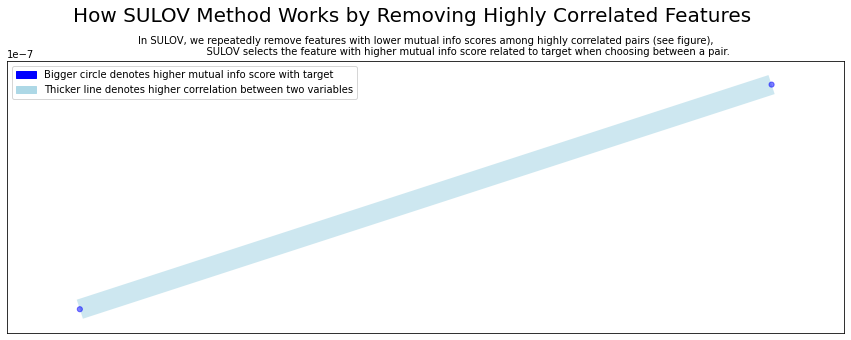

Time taken for SULOV method = 45 seconds
    Adding 2 categorical variables to reduced numeric variables  of 4
Final list of selected 6 vars after SULOV = ['PremiseCode', 'TimeOccurred', 'VictimAge', 'AreaID', 'VictimDescent', 'VictimSex']
Converting all features to numeric before sending to XGBoost...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after adding missing values flags = (1584316, 7)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 6 
    Taking top 1 features per iteration...
    XGBoost version using 1.7.3 as tree method: gpu_hist
Number of booster rounds = 20
        using 6 variables...
Regular XGBoost is crashing d

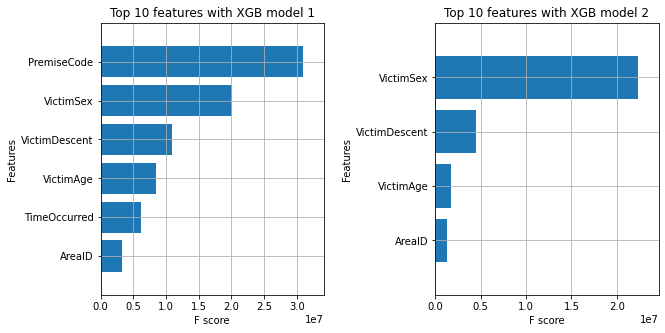

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 3 important features:
['PremiseCode', 'VictimSex', 'VictimDescent']
Total Time taken for featurewiz selection = 52 seconds
Output contains a list of 3 important features and a train dataframe


In [ ]:
!pip install featurewiz
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz

target = "Crime_Code"
 
features, train = featurewiz(df2,target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
print(features)

['Premise Code', 'Victim Sex', 'Victim Descent']


In [ ]:
X_new = train.drop(["Crime_Code"],axis=1)
y = train.Crime_Code.values

In [ ]:
y

array([626, 510, 510, ..., 649, 946, 236])

In [ ]:
X_scaled =  StandardScaler().fit_transform(X_new)
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2, random_state=1)
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.2605187083417491

In [ ]:
df_X

,Victim Sex_-,Victim Sex_F,Victim Sex_H,Victim Sex_M,Victim Sex_X,Victim Descent_-,Victim Descent_A,Victim Descent_B,Victim Descent_C,Victim Descent_D,...,Victim Descent_P,Victim Descent_S,Victim Descent_U,Victim Descent_V,Victim Descent_W,Victim Descent_X,Victim Descent_Z,Time Occurred,Victim Age,Area ID
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1800,30.0,12
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2300,30.0,20
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2030,12.0,18
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1800,12.0,18
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2300,84.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584311,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1005,51.0,21
1584312,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1200,40.0,21
1584313,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,52.0,21
1584314,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1845,47.0,21


In [ ]:
X=df_X.to_numpy()
y=df_Y.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.2,train_size=0.8, random_state=50, shuffle=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.3,train_size=0.7, random_state=30, shuffle=True)

In [ ]:
x_train

,Victim Sex_-,Victim Sex_F,Victim Sex_H,Victim Sex_M,Victim Sex_X,Victim Descent_-,Victim Descent_A,Victim Descent_B,Victim Descent_C,Victim Descent_D,...,Victim Descent_P,Victim Descent_S,Victim Descent_U,Victim Descent_V,Victim Descent_W,Victim Descent_X,Victim Descent_Z,Time Occurred,Victim Age,Area ID
1456901,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2130,59.0,6
786177,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1430,69.0,21
1433775,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1200,38.0,1
1567227,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,830,56.0,2
119741,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1330,47.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321502,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,600,20.0,1
441633,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1630,82.0,14
677997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,900,33.0,18
239499,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1740,29.0,4


In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  3%|▎         | 1/29 [05:36<2:37:11, 336.85s/it]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_mm=scaler.fit_transform(x_train)
x_test_mm=scaler.transform(x_test)

In [ ]:
x_train

array([[-0.21010075, -0.21138305, -0.22550091, ...,  1.43201337,
         0.06708172, -0.05186822],
       [-0.21010075, -0.21138305, -0.22550091, ...,  2.05253944,
         0.13425467, -0.092862  ],
       [ 4.75962128, -0.21138305, -0.22550091, ...,  0.12890861,
         0.04674587, -0.04244782],
       ...,
       [-0.21010075, -0.21138305, -0.22550091, ..., -0.18135443,
        -0.01252145, -0.04805417],
       [-0.21010075, -0.21138305, -0.22550091, ..., -0.42956486,
         0.04232071, -0.03965181],
       [-0.21010075, -0.21138305, -0.22550091, ..., -0.36751225,
         0.15702684, -0.06563318]])

In [ ]:
!pip install sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
models={
    "Logistic Regression":LogisticRegression(),
    "decision tree":DecisionTreeClassifier(),
    "random forest":RandomForestClassifier()
}
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)

  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)
  
  model_train_accuracy =accuracy_score(y_train,y_train_pred)
  model_train_f1 =accuracy_score(y_train,y_train_pred)
  model_train_precision =accuracy_score(y_train,y_train_pred)
  model_train_recall =accuracy_score(y_train,y_train_pred)
  model_train_rocauc_score =roc_auc_score(y_train,y_train_pred)

  print(list(models.keys())[i])

  print('model performance for training set' )
  print("Accuracy: [:.4f]".format(model_train_accuracy))
  print('-f1 score: {:.4f}'.format(model_train_f1))

  print('-Precision:{:.4f}'.format(model_train_precision))
  print("Recall: [:.4f]".format(model_train_recall))
  print('Roc Auc score: {:.4f}'.format(model_train_rocauc_score))

  print('................................................')


  print('model performance for test set' )
  print("Accuracy: [:.4f]".format(model_test_accuracy))
  print('-f1 score: {:.4f}'.format(model_test_f1))

  print('-Precision:{:.4f}'.format(model_test_precision))
  print("Recall: [:.4f]".format(model_test_recall))
  print('Roc Auc score: {:.4f}'.format(model_test_rocauc_score))
  




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X, y)

claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=300,bootstrap= True,criterion='entropy',max_depth=3,max_features=2,min_samples_leaf= 3)



# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)

#claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=300,bootstrap= True,criterion='entropy',max_depth=3,max_features=2,min_samples_leaf= 3)

## Cross Validation good for selecting models
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(claasifier,X,y,cv=10,scoring='accuracy').mean()

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
clf =linear_model.RidgeClassifier().fit(x_train_std, y_train)
clf.score(x_test_std,y_test)
#0.21095801353261967
#0.21092014239547566 (min max)

0.15032558726685533

In [ ]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(random_state=1, max_iter=30).fit(x_train_std, y_train)
clf3.score(x_test_std, y_test)
#0.21095801353261967
#0.24715650878610382

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


0.21952951423954756

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)
clf = GradientBoostingRegressor().fit(x_train_std, y_train)
clf.score(x_test_std,y_test)
#0.04086937292980242

0.03055551554262881

In [ ]:
# importing machine learning models for prediction
import xgboost as xgb
 
# importing bagging module
from sklearn.ensemble import BaggingRegressor
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)
clf = BaggingRegressor(base_estimator=xgb.XGBRegressor()).fit(x_train_std, y_train)
clf.score(x_test_std,y_test)

In [ ]:
!pip install markupsafe==2.0.1 Jinja2
!pip install pycaret3.0

from pycaret.classification import setup, compare_models, evaluate_model, predict_model, save_model, load_model
     

s = setup(df2, target='Crime_Code')
     

best_model = compare_models()

,Description,Value
0,session_id,5306
1,Target,Crime_Code
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1584316, 8)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Crime_Code', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:12:06
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 6.47425651550293e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7f0210684700>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, sh

In [ ]:
clf2 = linear_model.LogisticRegression(random_state=0,max_iter=50).fit(x_train, y_train)
clf2.score(x_test, y_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

clf3 = MLPClassifier(random_state=1, max_iter=30).fit(x_train_mm, y_train)
clf3.score(x_test_mm, y_test)
# 0.23119698040799838(1 hr)

NameError: ignored

In [ ]:
from sklearn import tree
clf4 = tree.DecisionTreeClassifier()
clf4.fit(x_train_std, y_train)
clf4.score(x_test_std,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train_std, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(x_test_std)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import svm
lin_clf = svm.LinearSVC(max_iter=1,verbose=1) # reduced iterations because higher iterations take a lot of time
lin_clf.fit(x_train_std, y_train)
lin_clf.score(x_test_std,y_test)

[LibLinear]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.012470219940842703

In [ ]:
from sklearn.linear_model import SGDClassifier
clf5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf5.fit(x_train_std, y_train)
clf5.score(x_test_std,y_test)

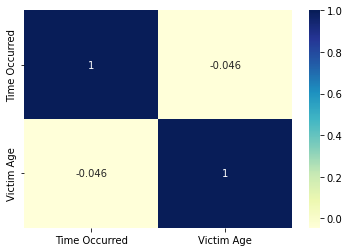

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dataplot = sns.heatmap(final_df.corr(), cmap="YlGnBu", annot=True)

plt.show()

indicating location Xand y are highly independent  

In [ ]:
!pip install gradio

In [ ]:
df_X.columns

Index(['Area ID_1', 'Area ID_10', 'Area ID_11', 'Area ID_12', 'Area ID_13',
       'Area ID_14', 'Area ID_15', 'Area ID_16', 'Area ID_17', 'Area ID_18',
       'Area ID_19', 'Area ID_2', 'Area ID_20', 'Area ID_21', 'Area ID_3',
       'Area ID_4', 'Area ID_5', 'Area ID_6', 'Area ID_7', 'Area ID_8',
       'Area ID_9', 'Victim Sex_-', 'Victim Sex_F', 'Victim Sex_H',
       'Victim Sex_M', 'Victim Sex_X', 'Victim Descent_-', 'Victim Descent_A',
       'Victim Descent_B', 'Victim Descent_C', 'Victim Descent_D',
       'Victim Descent_F', 'Victim Descent_G', 'Victim Descent_H',
       'Victim Descent_I', 'Victim Descent_J', 'Victim Descent_K',
       'Victim Descent_L', 'Victim Descent_O', 'Victim Descent_P',
       'Victim Descent_S', 'Victim Descent_U', 'Victim Descent_V',
       'Victim Descent_W', 'Victim Descent_X', 'Victim Descent_Z',
       'Time Occurred', 'Victim Age', 'location_x', 'location_y'],
      dtype='object')

In [ ]:
cols2=list(df_X.columns)
cols=[1,10,11,12,13,14,15,16,17,18,19,2,20,21,3,4,5,6,7,8,9,\
     '-','F','H','M','X','-','A','B','C','D','F','G','H','I','J','K','L','O','P','S','U','V','W','X','Z','time','age','x','y']

In [ ]:
df['Victim Sex'].unique()

array(['F', nan, 'M', 'H', 'X', '-'], dtype=object)

In [ ]:
cols2

In [ ]:
colas=[1,10,11,12,13,14,15,16,17,18,19,2,20,21,3,4,5,6,7,8,9,
       '-','F','H','M','X','-','A','B','C','D','F','G','H','I','J','K','L','O','P','S','U','V','W','X','Z','time','age','x','y']

In [ ]:
colas

In [ ]:
a=([0.0]*len(cols))
a

In [ ]:
import gradio as gr

def greet(time,area_id,age,sex,descent,x,y):
    time=int(time)
    area_id=int(area_id)
    age=float(age)
    x=float(x)
    y=float(y)
    cols=[1,10,11,12,13,14,15,16,17,18,19,2,20,21,3,4,5,6,7,8,9,\
     '-','F','H','M','X','-','A','B','C','D','F','G','H','I','J','K','L','O','P','S','U','V','W','X','Z','time','age','x','y']
    cols=(cols)
    a=([0.0]*len(cols))
    
    id_=cols.index(area_id)
    a[id_]=1
    
    if sex == "-":
        a[21]=1
    else:
        id_=cols[21:26].index(sex)
        a[id_]=1
        
    if descent == "-":
        a[26]=1
    else:
        id_=cols[26:-4].index(descent)
        a[id_]=1
    a[-1]=y
    a[-2]=x
    a[-3]=age
    a[-4]=time
    
    a=np.expand_dims(np.array(a),axis=0)
        
    return np.array(clf.predict(a)).item()

demo = gr.Interface(fn=greet, inputs=["text","text","text","text","text","text","text"], outputs="text")

demo.launch()